In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
college_statistics = pd.read_csv("archive/college_statistics.csv")
draft_prospects = pd.read_csv("archive/nfl_draft_prospects.csv")

In [7]:
# Flip the dataframe so that there is only one entry per year per individual

college_statistics_pivot = college_statistics.pivot_table(index=['player_id', 'alt_player_id', 'player_name', 'pos_abbr', 'school', 'school_abbr', 'school_primary_color', 'school_alt_color', 'season', 'active', 'all_star'],
                            columns='statistic',
                            values='value').reset_index()

In [8]:
# Really only care about the most recent year we think so only take the most recent entry according to season

idx = college_statistics_pivot.groupby('player_id')['season'].idxmax()
college_statistics_filtered = college_statistics_pivot.loc[idx]

In [9]:
college_statistics_filtered

statistic,player_id,alt_player_id,player_name,pos_abbr,school,school_abbr,school_primary_color,school_alt_color,season,active,...,Solo Tackles,Total Kicking Points,Total Points,Total Sacks,Total Tackles,Total Touchdowns,Total Two Point Conversions,Yards Per Pass Attempt,Yards Per Reception,Yards Per Rush Attempt
0,368,3924331,Justin Smith,DE,Missouri,MIZ,#000000,#000000,2016,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN
2,4019,4239824,Bryan Thomas,DE,UAB,UAB,#003b28,#ffc845,2018,True,...,50.0,NaN,NaN,NaN,68.0,NaN,NaN,NaN,NaN,NaN
5,4542,4240031,Derrick Brooks,LB,Florida State,FSU,#782F40,#ceb888,2020,True,...,4.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN
8,4559,4240091,Joe Johnson,DE,Louisville,LOU,#ad000a,#cccccc,2020,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN
11,14420,3915189,Royce Smith,OG,Georgia,UGA,#CC0000,#000000,2017,True,...,85.0,NaN,NaN,NaN,137.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,105462,4256041,Manny Jones,DE,Colorado State,CSU,#004537,#ffc425,2020,True,...,7.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN
3599,105464,4258170,Tarik Black,WR,Texas,TEX,#EE7524,#f0f0f0,2020,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN
3603,105465,4046532,Quinn Nordin,PK,Michigan,MICH,#00274c,#00274c,2020,True,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3607,105466,3121655,Justus Reed,DE,Virginia Tech,VT,#74232D,#c2c1ba,2020,True,...,17.0,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN


College Statistics only go through the following years:

- 2014
- 2015
- 2016
- 2017
- 2018
- 2019
- 2020

However the draft picks go back to 1967. We need to remove a lot of data for this to be even somewhat useful

In [10]:
threshold_value = 2014
column_to_check = 'draft_year'  # Adjust this column as needed
draft_prospects_filter = draft_prospects[(draft_prospects[column_to_check] >= threshold_value) & (draft_prospects[column_to_check] < 2021)]

In [11]:
draft_prospects_filter

,draft_year,player_id,player_name,position,pos_abbr,school,school_name,school_abbr,link,pick,...,team,team_abbr,team_logo_espn,guid,weight,height,pos_rk,ovr_rk,grade,player_image
10381,2014,33597,Jadeveon Clowney,Defensive End,DE,South Carolina,Gamecocks,SC,http://insider.espn.com/nfl/draft/player/_/id/...,1.0,...,Houston Texans,HOU,https://a.espncdn.com/i/teamlogos/nfl/500/scor...,83ac33664399764944a12a77437351a6,266.0,77.000,1.0,1.0,98.0,NaN
10382,2014,34748,Greg Robinson,Offensive Tackle,OT,Auburn,Tigers,AUB,http://insider.espn.com/nfl/draft/player/_/id/...,2.0,...,St. Louis Rams,STL,https://a.espncdn.com/i/teamlogos/nfl/500/scor...,02d871f9c875e0422dcc75236fa8e7cc,332.0,77.000,1.0,2.0,97.0,NaN
10383,2014,34717,Blake Bortles,Quarterback,QB,UCF,Knights,UCF,http://insider.espn.com/nfl/draft/player/_/id/...,3.0,...,Jacksonville Jaguars,JAX,https://a.espncdn.com/i/teamlogos/nfl/500/scor...,71ac24a6d3424966b5c6f006808d0d9c,232.0,77.000,1.0,18.0,91.0,NaN
10384,2014,33609,Sammy Watkins,Wide Receiver,WR,Clemson,Tigers,CLEM,http://insider.espn.com/nfl/draft/player/_/id/...,4.0,...,Buffalo Bills,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/scor...,c0cc8f4d3a91a03a72bc66f9f0b268eb,211.0,73.000,1.0,4.0,96.0,NaN
10385,2014,34108,Khalil Mack,Outside Linebacker,OLB,Buffalo,Bulls,BUFF,http://insider.espn.com/nfl/draft/player/_/id/...,5.0,...,Oakland Raiders,OAK,https://a.espncdn.com/i/teamlogos/nfl/500/scor...,ff7e62d0e88872c8ffe62d189c5ecdd2,251.0,75.000,1.0,3.0,96.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12983,2020,104149,David Dowell,Safety,S,Michigan State,Spartans,MSU,http://insider.espn.com/nfl/draft/player/_/id/...,NaN,...,NaN,NaN,NaN,ce03b6d3085022537b4de74d855505f9,206.0,72.500,25.0,301.0,31.0,https://a.espncdn.com/i/headshots/nfldraft/pla...
12984,2020,104197,Trevon Hill,Defensive End,DE,Miami,Hurricanes,MIA,http://insider.espn.com/nfl/draft/player/_/id/...,NaN,...,NaN,NaN,NaN,7b98ea40cdb58193165965cc0a864452,248.0,74.875,28.0,302.0,31.0,https://a.espncdn.com/i/headshots/nfldraft/pla...
12985,2020,104403,Darius Anderson,Running Back,RB,TCU,Horned Frogs,TCU,http://insider.espn.com/nfl/draft/player/_/id/...,NaN,...,NaN,NaN,NaN,43f7ee51c02aeb61a7f78fc99bce9807,208.0,70.500,30.0,303.0,31.0,https://a.espncdn.com/i/headshots/nfldraft/pla...
12986,2020,104661,Nevelle Clarke,Cornerback,CB,UCF,Knights,UCF,http://insider.espn.com/nfl/draft/player/_/id/...,NaN,...,NaN,NaN,NaN,273551d0dbb5f7d5a322b6a141a4fcd6,190.0,72.875,32.0,305.0,31.0,NaN


In [12]:
merged_df = pd.merge(college_statistics_filtered, draft_prospects_filter, on='player_id', how='left')

We do a left join because we want to keep all potential individuals. If they have an NA next to their draft pick number, it means they weren't selected and that's useful information for us!

In [28]:
merged_df.iloc[0:10,:]

,player_id,alt_player_id,player_name_x,pos_abbr_x,school_x,school_abbr_x,school_primary_color,school_alt_color,season,active,...,team,team_abbr,team_logo_espn,guid,weight,height,pos_rk,ovr_rk,grade,player_image
0,368,3924331,Justin Smith,DE,Missouri,MIZ,#000000,#000000,2016,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4019,4239824,Bryan Thomas,DE,UAB,UAB,#003b28,#ffc845,2018,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4542,4240031,Derrick Brooks,LB,Florida State,FSU,#782F40,#ceb888,2020,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4559,4240091,Joe Johnson,DE,Louisville,LOU,#ad000a,#cccccc,2020,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14420,3915189,Royce Smith,OG,Georgia,UGA,#CC0000,#000000,2017,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,14888,4039597,Jackie Wallace,DB,Arizona,ARIZ,#002449,#00205b,2020,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,17055,3921651,Ronnie Smith,WR,San Diego State,SDSU,#BF2C37,#a8996e,2018,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,17339,4043089,Jack Thompson,QB,Washington State,WSU,#94022a,#6a747c,2018,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18674,4259643,Bruce Matthews,OG,USC,USC,#AE2531,#ffc72c,2020,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,18803,4242976,Dokie Williams,WR,UCLA,UCLA,#005C8E,#ffc72c,2018,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
print(merged_df.iloc[:,91].isna().sum())

419


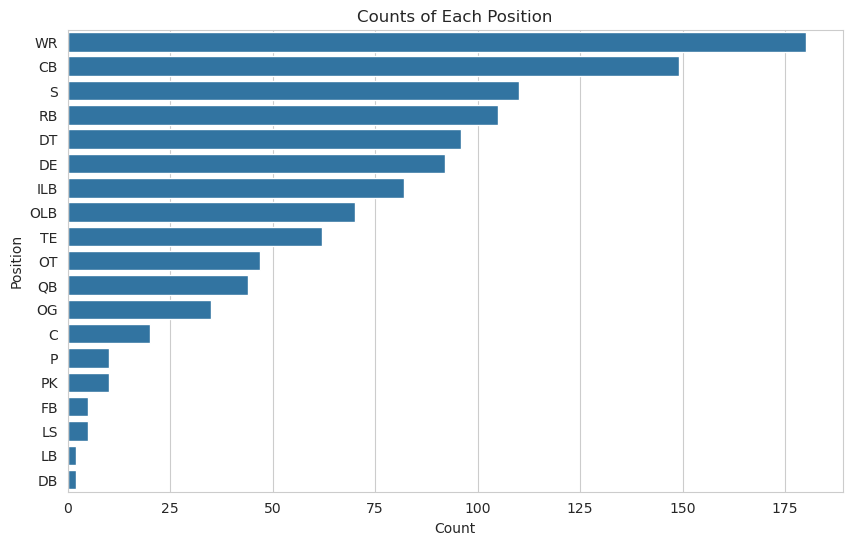

In [34]:
sns.set_style("whitegrid")

# Create a count plot for positions
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=merged_df, y='pos_abbr_x', order = merged_df['pos_abbr_x'].value_counts().index)

# Add title and labels to the plot
plt.title('Counts of Each Position')
plt.xlabel('Count')
plt.ylabel('Position')

# Show the plot
plt.show()

In [41]:
qbs = merged_df[merged_df['pos_abbr_x'] == 'QB']
qbs

,player_id,alt_player_id,player_name_x,pos_abbr_x,school_x,school_abbr_x,school_primary_color,school_alt_color,season,active,all_star,Assist Tackles,Completion Percentage,Completions,Extra Points Made,FGM 1-19 yards,FGM 20-29 yards,FGM 30-39 yards,FGM 40-49 yards,FGM 50+ yards,Field Goal Attempts,Field Goal Made,Field Goal Percentage,Field Goals,Forced Fumbles,Gross Average Punt Yards,Interception Touchdowns,Interception Yards,Interceptions,Kick Extra Points,Kick Return Touchdowns,Kick Return Yards,Kick Returns,Long Field Goal Made,Long Kick Return,Long Punt,Long Punt Return,Long Reception,Long Rushing,Longest Pass,Passer Rating,Passes Defended,Passing Attempts,Passing Touchdowns,Passing Yards,Punt Return Fair Catches,Punt Return Touchdowns,Punt Return Yards,Punt Returns,Punt Yards,Punts,Receiving Touchdowns,Receiving Yards,Receptions,Return Touchdowns,Rushing Attempts,Rushing Touchdowns,Rushing Yards,Sacks,Solo Tackles,Total Kicking Points,Total Points,Total Sacks,Total Tackles,Total Touchdowns,Total Two Point Conversions,Yards Per Pass Attempt,Yards Per Reception,Yards Per Rush Attempt,draft_year,player_name_y,position,pos_abbr_y,school_y,school_name,school_abbr_y,link,pick,overall,round,traded,trade_note,team,team_abbr,team_logo_espn,guid,weight,height,pos_rk,ovr_rk,grade,player_image
7,17339,4043089,Jack Thompson,QB,Washington State,WSU,#94022a,#6a747c,2018,True,False,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,-10.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,0.0,0.0,-10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,40.0,NaN,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,51563,3122840,Deshaun Watson,QB,Clemson,CLEM,#F66733,#522d80,2016,True,False,NaN,67.0,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,38.0,NaN,NaN,17.0,0.0,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,33.0,65.0,151.1,NaN,579.0,41.0,4593.0,NaN,NaN,NaN,NaN,38.0,1.0,0.0,NaN,NaN,0.0,165.0,9.0,629.0,NaN,NaN,NaN,90.0,17.0,NaN,15.0,0.0,7.9,NaN,3.8,2017.0,Deshaun Watson,Quarterback,QB,Clemson,Tigers,CLEM,http://insider.espn.com/nfl/draft/player/_/id/...,12.0,12.0,1.0,True,From PHI through CLE,Houston Texans,HOU,https://a.espncdn.com/i/teamlogos/nfl/500/scor...,b6ec8e9e3d85a1de9d0a5a51621a9c20,221.0,75.000,2.0,28.0,88.0,https://a.espncdn.com/i/headshots/nfldraft/pla...
32,51567,3123048,Brad Kaaya,QB,Miami,MIAMI,#004325,#f0f0f0,2016,True,False,NaN,62.0,261.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,77.0,150.3,NaN,421.0,27.0,3532.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,37.0,1.0,-136.0,NaN,NaN,NaN,6.0,25.0,NaN,1.0,0.0,8.4,NaN,-3.7,2017.0,Brad Kaaya,Quarterback,QB,Miami,Hurricanes,MIAMI,http://insider.espn.com/nfl/draft/player/_/id/...,32.0,215.0,6.0,True,From NE,Detroit Lions,DET,https://a.espncdn.com/i/teamlogos/nfl/500/scor...,8c5f3bcf094e628136fc64e125c865d8,214.0,76.000,8.0,116.0,69.0,https://a.espncdn.com/i/headshots/nfldraft/pla...
43,51681,3129302,DeShone Kizer,QB,Notre Dame,ND,#00122b,#ae9142,2016,True,False,NaN,58.7,212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,37.0,NaN,NaN,9.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0,NaN,4.0,49.0,79.0,145.6,NaN,361.0,26.0,2925.0,NaN,NaN,NaN,NaN,37.0,1.0,0.0,4.0,1.0,0.0,129.0,8.0,472.0,NaN,NaN,NaN,48.0,25.0,NaN,8.0,0.0,8.1,4.0,3.7,2017.0,DeShone Kizer,Quarterback,QB,Notre Dame,Fighting Irish,ND,http://insider.espn.com/nfl/draft/player/_/id/...,20.0,52.0,2.0,True,From TEN,Cleveland Browns,CLE,https://a.espncdn.com/i/teamlogos/nfl/500/scor...,ca09bb4eb8c4c00f635abab6346d2eb2,233.0,76.000,4.0,54.0,82.0,https://a.espncdn.com/i/headshots/nfldraft/pla...
73,52092,3139477,Patrick Mahomes,QB,Texas Tech,TTU,#C80025,#231f20,2016,True,False,NaN,65.7,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,81.0,157.0,NaN,591.0,41.0,5052.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,131.0,12.0,285.0,NaN,NaN,NaN,72.0,27.0,NaN

In [40]:
pd.set_option('display.max_columns', None)  # Adjust to ensure all columns are displayed
pd.set_option('display.max_rows', None)
qbs.iloc[1:2,:]

,player_id,alt_player_id,player_name_x,pos_abbr_x,school_x,school_abbr_x,school_primary_color,school_alt_color,season,active,all_star,Assist Tackles,Completion Percentage,Completions,Extra Points Made,FGM 1-19 yards,FGM 20-29 yards,FGM 30-39 yards,FGM 40-49 yards,FGM 50+ yards,Field Goal Attempts,Field Goal Made,Field Goal Percentage,Field Goals,Forced Fumbles,Gross Average Punt Yards,Interception Touchdowns,Interception Yards,Interceptions,Kick Extra Points,Kick Return Touchdowns,Kick Return Yards,Kick Returns,Long Field Goal Made,Long Kick Return,Long Punt,Long Punt Return,Long Reception,Long Rushing,Longest Pass,Passer Rating,Passes Defended,Passing Attempts,Passing Touchdowns,Passing Yards,Punt Return Fair Catches,Punt Return Touchdowns,Punt Return Yards,Punt Returns,Punt Yards,Punts,Receiving Touchdowns,Receiving Yards,Receptions,Return Touchdowns,Rushing Attempts,Rushing Touchdowns,Rushing Yards,Sacks,Solo Tackles,Total Kicking Points,Total Points,Total Sacks,Total Tackles,Total Touchdowns,Total Two Point Conversions,Yards Per Pass Attempt,Yards Per Reception,Yards Per Rush Attempt,draft_year,player_name_y,position,pos_abbr_y,school_y,school_name,school_abbr_y,link,pick,overall,round,traded,trade_note,team,team_abbr,team_logo_espn,guid,weight,height,pos_rk,ovr_rk,grade,player_image
31,51563,3122840,Deshaun Watson,QB,Clemson,CLEM,#F66733,#522d80,2016,True,False,NaN,67.0,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,38.0,NaN,NaN,17.0,0.0,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,33.0,65.0,151.1,NaN,579.0,41.0,4593.0,NaN,NaN,NaN,NaN,38.0,1.0,0.0,NaN,NaN,0.0,165.0,9.0,629.0,NaN,NaN,NaN,90.0,17.0,NaN,15.0,0.0,7.9,NaN,3.8,2017.0,Deshaun Watson,Quarterback,QB,Clemson,Tigers,CLEM,http://insider.espn.com/nfl/draft/player/_/id/...,12.0,12.0,1.0,True,From PHI through CLE,Houston Texans,HOU,https://a.espncdn.com/i/teamlogos/nfl/500/scor...,b6ec8e9e3d85a1de9d0a5a51621a9c20,221.0,75.0,2.0,28.0,88.0,https://a.espncdn.com/i/headshots/nfldraft/pla...


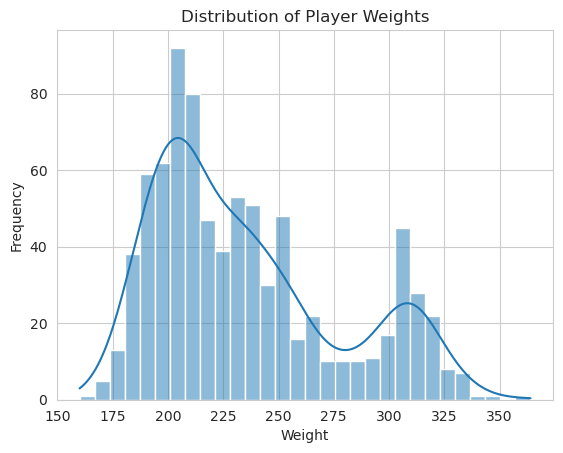

In [42]:
sns.histplot(merged_df['weight'], bins=30, kde=True)
plt.title('Distribution of Player Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

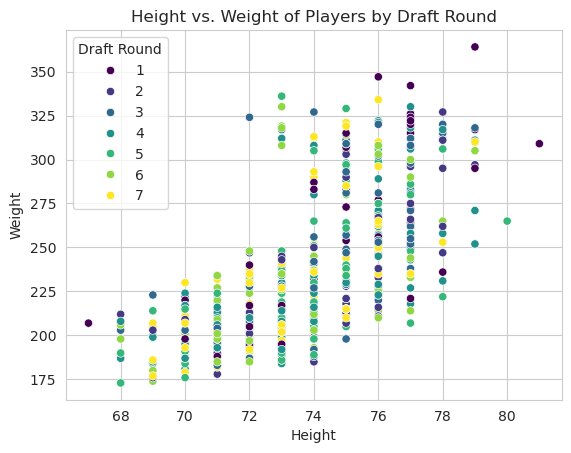

In [48]:
sns.scatterplot(x='height', y='weight', hue='round', data=merged_df, palette='viridis')

plt.title('Height vs. Weight of Players by Draft Round')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(title='Draft Round')
plt.show()

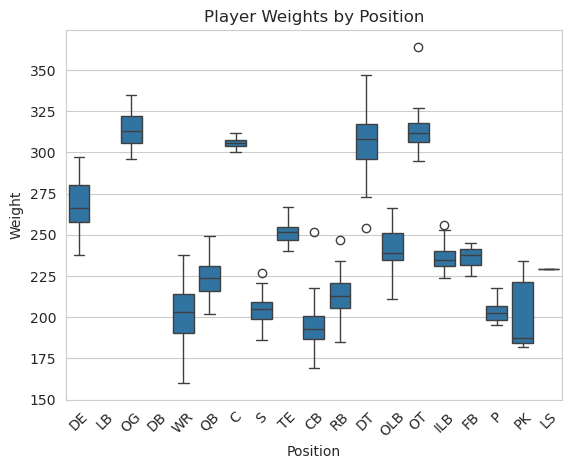

In [44]:
sns.boxplot(x='pos_abbr_x', y='weight', data=merged_df)
plt.title('Player Weights by Position')
plt.xlabel('Position')
plt.ylabel('Weight')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

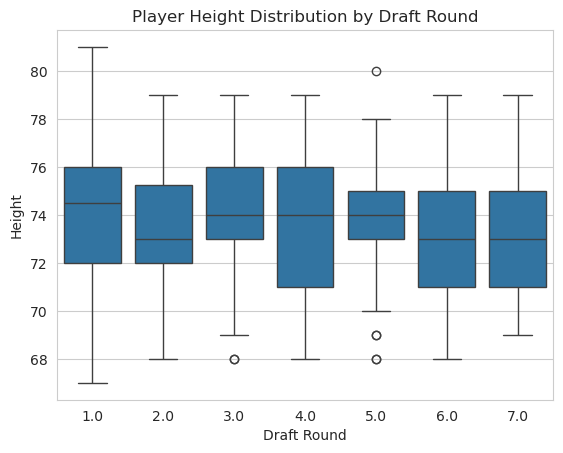

In [49]:
sns.boxplot(x='round', y='height', data=merged_df)
plt.title('Player Height Distribution by Draft Round')
plt.xlabel('Draft Round')
plt.ylabel('Height')
plt.show()

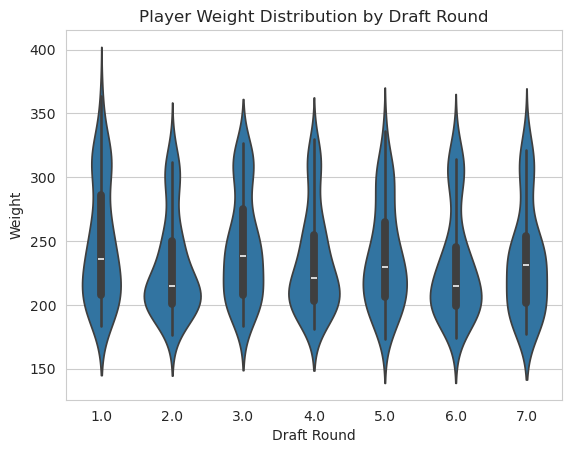

In [50]:
sns.violinplot(x='round', y='weight', data=merged_df)
plt.title('Player Weight Distribution by Draft Round')
plt.xlabel('Draft Round')
plt.ylabel('Weight')
plt.show()

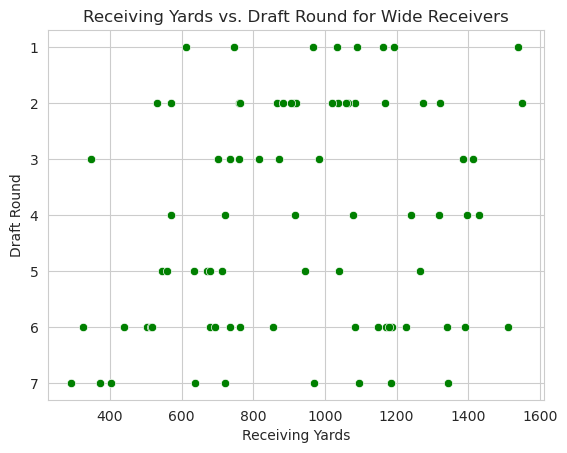

In [62]:
wrs = merged_df[merged_df['pos_abbr_x'] == 'WR']

# Plotting receiving yards vs. draft round for wide receivers
sns.scatterplot(x='Receiving Yards', y='round', data=wrs, color='green')

plt.gca().invert_yaxis()  # Inverting y-axis so the 1st round is at the top
plt.title('Receiving Yards vs. Draft Round for Wide Receivers')
plt.xlabel('Receiving Yards')
plt.ylabel('Draft Round')
plt.show()